# Parallel Axis Plot - Climate Change

Files are in /scratch/smj5vup/omoScenarios/BestPolicyEachObjCC/Objectives for DPS and Uncontrolled climate change scenarios, each policy and projection in a separate file. This notebook combines those files. 

## Packages and Filepaths

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from utilities_climate import *
from utilities import *
import string

In [2]:
# filepaths
fpath_dps = '../../Objectives/DPS_MEF'
fpath_uc = '../../Objectives/Uncontrolled'

# filepaths
fpath_mc = '../Data/Objectives/MidCentury'
fpath_lc = '../Data/Objectives/LateCentury'

In [3]:
df = pd.read_csv(os.path.join(fpath_dps,os.listdir(fpath_dps)[0]), names = ['Mid', 'Late'])

In [4]:
df.head()

,Mid,Late
0,-5.188551e+02,-6.273293e+02
1,2.501606e-01,4.416264e-01
2,2.844900e+00,2.210003e-01
3,-3.644353e+09,-3.816013e+09
4,-2.703086e+07,-2.703086e+07


In [5]:
# define objectives 
objectives = ['Hydropower', 'Environment', 'Recession', 'Sugar', 'Cotton'] 

# Make New Objectives Dataframes

In [6]:
DPS_MC = dict.fromkeys(objectives)
DPS_LC = dict.fromkeys(objectives)
UC_MC = dict.fromkeys(objectives)
UC_LC = dict.fromkeys(objectives)

In [7]:
DPS_MC, DPS_LC = combineData(fpath_dps, DPS_MC, DPS_LC, 98, objectives)

In [8]:
for key in DPS_MC:
    DPS_MC[key].to_csv('../Data/Objectives/MidCentury/%s_DPS_MEF_redo.csv' % key)
    DPS_LC[key].to_csv('../Data/Objectives/LateCentury/%s_DPS_MEF_redo.csv'% key)

In [9]:
for obj in objectives:
    DPS_MC[obj] = pd.read_csv(os.path.join(fpath_mc, '%s_DPS_MEF_redo.csv' % obj), index_col = 'Unnamed: 0')
    DPS_LC[obj] = pd.read_csv(os.path.join(fpath_lc, '%s_DPS_MEF_redo.csv' % obj), index_col = 'Unnamed: 0')
    UC_MC[obj] = pd.read_csv(os.path.join(fpath_mc, '%s_UC.csv' % obj),index_col = 'Unnamed: 0')
    UC_LC[obj] = pd.read_csv(os.path.join(fpath_lc, '%s_UC.csv' % obj),index_col = 'Unnamed: 0')

# Sort Projections
Sort projections based on most important factor impacting a given objective. For hydropower, environmental flows, and flood recession agriculture that is the "wetness" vs for cotton and sugar it is temperature. 

## Sort Dry to Wet

In [10]:
# determine uncontrolled flows for each objective and sort 
projections = UC_MC['Hydropower'].index 
fpath_ts = '../../Timeseries/Uncontrolled'
UC_ts = dict.fromkeys(projections)
for proj in projections:
    UC_ts[proj] = pd.read_csv(os.path.join(fpath_ts, '%s_UC_Flow.csv' % proj), index_col = 'Unnamed: 0')

In [11]:
# mean flow of uncontrolled 
UC_mean = dict.fromkeys(projections)
for proj in projections:
    UC_mean[proj] = UC_ts[proj]['flow'].mean()

In [12]:
# sort projections 
sorted_projs = printDict(UC_mean)
print("Flow:", UC_mean[sorted_projs[0]], UC_mean[sorted_projs[-1]])
flow_ls = [UC_mean[sorted_projs[f]] for f in range(len(sorted_projs))]

Flow: 363.42966545566674 926.0756603008304


In [17]:
# historical uncontrolled 
uc_huc = pd.read_csv("/project/quinnlab/smj5vup/2023_Paper_Updates/omoScenarios/Historical/Timeseries/Uncontrolled/Historical_00_Flow.csv",  index_col = 'Unnamed: 0')
uc_huc_flow = uc_huc['flow'].mean()
print("HUC: ", uc_huc_flow)

HUC:  589.6278690143291


In [18]:
# find projection closest to huc
abv = {}
blw = {}
for proj in projections:
    # closest above
    if uc_huc_flow - UC_mean[proj] < 0:
        abv[proj] = abs(uc_huc_flow - UC_mean[proj])
    else:
        blw[proj] = abs(uc_huc_flow - UC_mean[proj])


print("Closest above: ", min(abv, key=abv.get))
print("Closest below: ", min(blw, key=blw.get))

Closest above:  CSIRO-Mk3-6-0.rcp45
Closest below:  CSIRO-Mk3-6-0.rcp60


## Sort by Temperature

In [19]:
# sort by temp 
temp = pd.read_csv('../Data/ClimateDeltas.csv')
temp = temp.sort_values(by=['tasmax_2040_2069_ann'])
print("Temp:", temp['tasmax_2040_2069_ann'].min(), temp['tasmax_2040_2069_ann'].max())

sorted_temp_projs = temp['model'].tolist()
sorted_temp_projs = [f[:-7].replace("_", ".") for f in  sorted_temp_projs]
sorted_temp_projs = [f for f in sorted_temp_projs if f in projections]

df_test = temp[['tasmax_2040_2069_ann', 'model']]
df_test['model'] = [f[:-7].replace("_", ".") for f in  temp['model'].tolist()]
temp_ls = df_test[df_test.model.isin(projections)]['tasmax_2040_2069_ann']

Temp: 0.2610718510514793 3.3379427346961243


<ipython-input-19-c9e4d4b84ee7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['model'] = [f[:-7].replace("_", ".") for f in  temp['model'].tolist()]


# Manage Robust Policies

In [20]:
col_dict = {}
for key in ROBUST_POLICIES:
    if key != 'PUC':
        v = int(ROBUST_POLICIES[key][1:])
        c = COLOR_DICTIONARY[f'{key} Policy']
        col_dict[v] = c

In [21]:
ROBUST_POLICY_INTEGERS = [int(p[1:]) for p in ROBUST_POLICY_LIST[:-1]]

ROBUST_POLICY_INTEGERS

In [22]:
ROBUST_POLICY_LIST

['P86', 'P72', 'P41', 'PUC']

In [23]:
col_dict

{86: 0.25, 72: 0.75, 41: 0.5}

# Plots

## Prep Data for Plotting

In [24]:
# comined pareto set
DPS_MC_combined = dict.fromkeys(objectives)
DPS_LC_combined = dict.fromkeys(objectives)
UC_MC_sorted = dict.fromkeys(objectives)
UC_LC_sorted = dict.fromkeys(objectives)

In [25]:
for obj in objectives:
    DPS_MC_combined[obj] = DPS_MC[obj]
    DPS_LC_combined[obj] = DPS_LC[obj]

In [26]:
for obj in objectives:
    if obj in ["Sugar", "Cotton"]:
        DPS_MC_combined[obj] = DPS_MC_combined[obj].reindex(sorted_temp_projs)
        DPS_LC_combined[obj] =  DPS_LC_combined[obj].reindex(sorted_temp_projs)
        UC_MC_sorted[obj] = UC_MC[obj].reindex(sorted_temp_projs)
        UC_LC_sorted[obj] = UC_LC[obj].reindex(sorted_temp_projs)        
    else:
        DPS_MC_combined[obj] = DPS_MC_combined[obj].reindex(sorted_projs)
        DPS_LC_combined[obj] =  DPS_LC_combined[obj].reindex(sorted_projs)
        UC_MC_sorted[obj] = UC_MC[obj].reindex(sorted_projs)
        UC_LC_sorted[obj] = UC_LC[obj].reindex(sorted_projs) 

## Plot

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload

In [28]:
import utilities_climate
reload(utilities_climate)
from utilities_climate import PAP_ltd

0
1
2
3
4


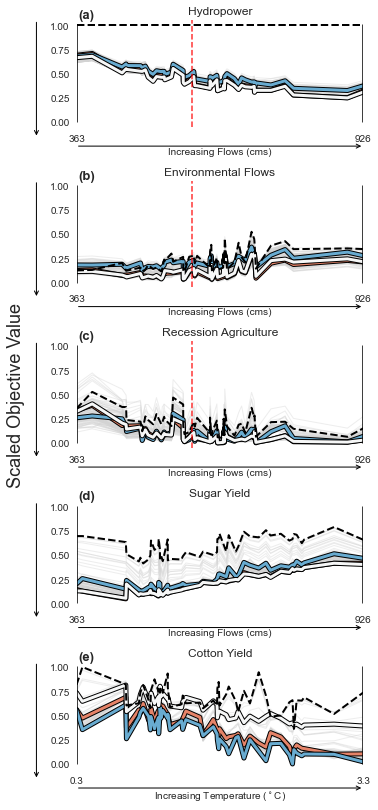

In [29]:

sns.set_style("white")
fig, axes = plt.subplots(5,1)
cmap_brush = plt.cm.get_cmap("RdBu")

n = 0 
for ax in axes.flatten():
    print(n)
    if n < 3:
        PAP_ltd(ax, DPS_MC_combined, UC_MC_sorted, objectives[n], ROBUST_POLICY_LIST[:-1], DPS_LC_combined, UC_LC, flow_ls, cmap_brush, col_dict, uc_huc = uc_huc_flow, huc_blw = min(blw, key=blw.get))
    else:
        PAP_ltd(ax, DPS_MC_combined, UC_MC_sorted, objectives[n], ROBUST_POLICY_LIST[:-1], DPS_LC_combined, UC_LC, temp_ls, cmap_brush, col_dict)

    ax.annotate('', xy=(0, -0.18), xycoords='axes fraction', xytext=(1, -0.18),
            arrowprops=dict(arrowstyle="<-", color='black'))

    
    ax.set_ylim(-0.05,1.05)

    if n > 3:
        ax.set_xlabel("Increasing Temperature ($^\circ$C)")
        ax.set_xticklabels(["0.3", "3.3"])
    else:
        ax.set_xlabel("Increasing Flows (cms)")
        ax.set_xticklabels(["363", "926"])

    ax.annotate('', xy=(-0.14, -0.1), xycoords='axes fraction', xytext=(-0.14, 1),
        arrowprops=dict(arrowstyle="->", color='black'))
    
    ax.text(0.008, 1.02, "("+ string.ascii_lowercase[n] + ")", transform=ax.transAxes, size=13, weight='bold')       
    
    # make subplot frames invisible
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    for i in [min(temp_ls), max(temp_ls), min(flow_ls), max(flow_ls)]:
        ax.plot([i,i], [0,1], color='black')
    
    n+=1



axes.flatten()[2].set_ylabel("Scaled Objective Value", fontsize=18,labelpad=25)

fig.set_size_inches([5.3625, 11.3625])
fig.tight_layout()
fig.savefig('Figures/06_PAP_ClimateChange.svg', bbox_inches='tight')
fig.savefig('Figures/06_PAP_ClimateChange.png', bbox_inches='tight')
fig.savefig('Figures/06_PAP_ClimateChange.pdf', bbox_inches='tight')

